In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배_naver_blog_992.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배_naver_blog_992.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배_naver_blog_992.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 11456)	1
  (1, 7682)	1
  (2, 5109)	1
  (3, 2605)	1
  (4, 10830)	1
  (5, 5138)	1
  (6, 1568)	1
  (7, 6435)	1
  (8, 8623)	1
  (9, 3815)	1
  (10, 4610)	1
  (11, 7359)	1
  (12, 6069)	1
  (13, 31)	1
  (14, 7362)	1
  (15, 7270)	1
  (16, 8686)	1
  (17, 6587)	1
  (18, 9278)	1
  (19, 3523)	1
  (20, 5081)	1
  (21, 11891)	1
  (22, 1120)	1
  (23, 5081)	1
  (24, 9393)	1
  :	:
  (244385, 565)	1
  (244386, 9627)	1
  (244387, 5138)	1
  (244388, 9003)	1
  (244389, 565)	1
  (244390, 946)	1
  (244391, 1862)	1
  (244392, 10463)	1
  (244393, 10215)	1
  (244394, 8191)	1
  (244395, 1293)	1
  (244396, 3161)	1
  (244397, 8979)	1
  (244398, 11255)	1
  (244399, 10215)	1
  (244400, 4966)	1
  (244401, 10890)	1
  (244402, 9180)	1
  (244403, 4002)	1
  (244404, 11255)	1
  (244405, 9180)	1
  (244406, 5112)	1
  (244407, 8298)	1
  (244408, 10463)	1
  (244409, 5112)	1


In [8]:
print(vectorize.vocabulary_)

{'해외': 11456, '유명': 7682, '상보': 5109, '디케이': 2605, '팩토리': 10830, '상이': 5138, '날씨': 1568, '아침': 6435, '저녁': 8623, '바람': 3815, '불어': 4610, '외출': 7359, '시엔': 6069, '가디건': 31, '외투': 7362, '온도': 7270, '전담': 8686, '애용': 6587, '쥬스': 9278, '몬스터': 3523, '상값': 5081, '훌쩍': 11891, '그때': 1120, '지출': 9393, '저축': 8647, '살림살이': 5050, '좀처럼': 9071, '모로': 3475, '예전': 7148, '연초': 7056, '점도': 8809, '금연': 1225, '위해': 7641, '커녕': 10119, '상물욕': 5106, '뿜어져': 4890, '사람': 4920, '욕심': 7422, '점점': 8824, '사서': 4950, '보고': 4283, '입맛': 8295, '매장': 3296, '가게': 2, '가격': 3, '달라': 2011, '때문': 2648, '스트레스': 5922, '친구': 10024, '사고': 4906, '콧노래': 10248, '배신': 4055, '직구': 9414, '몇번': 3454, '부탁': 4502, '무니': 3561, '격감': 478, '전혀': 8773, '마치': 3143, '콜라': 10234, '느낌': 1842, '국내': 1005, '온라인': 7271, '쇼핑몰': 5663, '한참': 11370, '마음': 3112, '성애자': 5421, '상전': 5146, '실패': 6223, '거듭': 352, '지라': 9346, '처음': 9694, '크게': 10287, '주문': 9145, '제품': 8979, '정말': 8866, '인지': 8135, '정보': 8874, '공유': 783, '후기': 11853, '모드': 3468, '한번': 11341, 

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'해외': 137,
 '유명': 28,
 '상보': 1,
 '디케이': 21,
 '팩토리': 82,
 '상이': 411,
 '날씨': 116,
 '아침': 55,
 '저녁': 48,
 '바람': 35,
 '불어': 11,
 '외출': 27,
 '시엔': 2,
 '가디건': 2,
 '외투': 6,
 '온도': 464,
 '전담': 273,
 '애용': 39,
 '쥬스': 281,
 '몬스터': 564,
 '상값': 2,
 '훌쩍': 6,
 '그때': 67,
 '지출': 32,
 '저축': 1,
 '살림살이': 1,
 '좀처럼': 6,
 '모로': 34,
 '예전': 169,
 '연초': 1092,
 '점도': 55,
 '금연': 865,
 '위해': 375,
 '커녕': 3,
 '상물욕': 1,
 '뿜어져': 9,
 '사람': 702,
 '욕심': 22,
 '점점': 87,
 '사서': 32,
 '보고': 360,
 '입맛': 60,
 '매장': 1076,
 '가게': 143,
 '가격': 579,
 '달라': 68,
 '때문': 1652,
 '스트레스': 101,
 '친구': 405,
 '사고': 55,
 '콧노래': 1,
 '배신': 3,
 '직구': 47,
 '몇번': 46,
 '부탁': 7,
 '무니': 3,
 '격감': 229,
 '전혀': 255,
 '마치': 123,
 '콜라': 13,
 '느낌': 990,
 '국내': 294,
 '온라인': 205,
 '쇼핑몰': 85,
 '한참': 36,
 '마음': 496,
 '성애자': 2,
 '상전': 1,
 '실패': 30,
 '거듭': 6,
 '지라': 7,
 '처음': 672,
 '크게': 185,
 '주문': 263,
 '제품': 3584,
 '정말': 1404,
 '인지': 39,
 '정보': 304,
 '공유': 23,
 '후기': 173,
 '모드': 1396,
 '한번': 672,
 '집중': 23,
 '보이시': 12,
 '나용': 1,
 '해저': 2,
 '쭙쭙': 1,
 '정리': 45

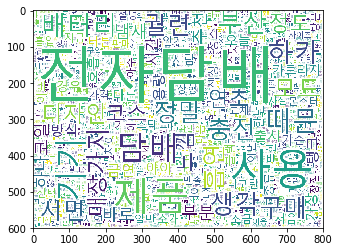

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'해외': 11456, '유명': 7682, '상보': 5109, '디케이': 2605, '팩토리': 10830, '상이': 5138, '날씨': 1568, '아침': 6435, '저녁': 8623, '바람': 3815, '불어': 4610, '외출': 7359, '시엔': 6069, '가디건': 31, '외투': 7362, '온도': 7270, '전담': 8686, '애용': 6587, '쥬스': 9278, '몬스터': 3523, '상값': 5081, '훌쩍': 11891, '그때': 1120, '지출': 9393, '저축': 8647, '살림살이': 5050, '좀처럼': 9071, '모로': 3475, '예전': 7148, '연초': 7056, '점도': 8809, '금연': 1225, '위해': 7641, '커녕': 10119, '상물욕': 5106, '뿜어져': 4890, '사람': 4920, '욕심': 7422, '점점': 8824, '사서': 4950, '보고': 4283, '입맛': 8295, '매장': 3296, '가게': 2, '가격': 3, '달라': 2011, '때문': 2648, '스트레스': 5922, '친구': 10024, '사고': 4906, '콧노래': 10248, '배신': 4055, '직구': 9414, '몇번': 3454, '부탁': 4502, '무니': 3561, '격감': 478, '전혀': 8773, '마치': 3143, '콜라': 10234, '느낌': 1842, '국내': 1005, '온라인': 7271, '쇼핑몰': 5663, '한참': 11370, '마음': 3112, '성애자': 5421, '상전': 5146, '실패': 6223, '거듭': 352, '지라': 9346, '처음': 9694, '크게': 10287, '주문': 9145, '제품': 8979, '정말': 8866, '인지': 8135, '정보': 8874, '공유': 783, '후기': 11853, '모드': 3468, '한번': 11341, 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트

stop_word = ['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', 
             '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '정도', '청소', '직접', '가장', '이번', 
             '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', 
             '항상', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', 
             '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', 
             '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', 
             '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', 
             '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']

for s in stop_word:
    dict_result.pop(s)

sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 2485.0)
('충전', 1430.0)
('구매', 1354.0)
('디자인', 1172.0)
('매장', 1076.0)
('코스', 1041.0)
('냄새', 989.0)
('추천', 889.0)
('출시', 815.0)
('용량', 815.0)
('호흡', 798.0)
('아이', 779.0)
('색상', 644.0)
('버튼', 632.0)
('종류', 621.0)
('이프', 612.0)
('가격', 579.0)
('인기', 566.0)
('몬스터', 564.0)
('방문', 559.0)
('흡입', 546.0)
('시연', 531.0)
('장점', 523.0)
('상형', 517.0)
('스틱', 514.0)
('교체', 510.0)
('스팟', 494.0)
('판매', 487.0)
('멘솔', 486.0)
('사이즈', 469.0)
('온도', 464.0)
('문의', 464.0)
('슬림', 428.0)
('비교', 423.0)
('휴대', 419.0)
('구입', 403.0)
('베이핑', 402.0)
('플러스', 402.0)
('크기', 392.0)
('조절', 383.0)
('개인', 375.0)
('기술', 365.0)
('출구', 361.0)
('브랜드', 360.0)
('케이', 357.0)
('미니', 349.0)
('선물', 333.0)
('클라우드', 320.0)
('박스', 313.0)
('영업', 312.0)
('정보', 304.0)
('보시', 303.0)
('이상', 303.0)
('모습', 302.0)
('히팅', 302.0)
('무화량', 301.0)
('국내', 294.0)
('망고', 282.0)
('쥬스', 281.0)
('고민', 276.0)
('단점', 274.0)
('분리', 274.0)
('전담', 273.0)
('고객', 273.0)
('걱정', 271.0)
('연기', 270.0)
('전용', 269.0)
('본체', 268.0)
('과일', 265.0)
('표현', 265.0)
('무게'

('초록색', 22.0)
('과즙', 22.0)
('내용물', 22.0)
('캠핑', 22.0)
('과열', 22.0)
('만날', 22.0)
('부피', 22.0)
('접촉', 22.0)
('피기', 22.0)
('독보', 22.0)
('기입', 22.0)
('트렌드', 22.0)
('유발', 22.0)
('신사역', 22.0)
('브러시', 22.0)
('손가락', 22.0)
('천연', 22.0)
('감각', 22.0)
('미스', 22.0)
('국민', 22.0)
('뱃전', 22.0)
('모던', 22.0)
('웨이', 22.0)
('코모', 22.0)
('전해질', 22.0)
('어드브켄', 22.0)
('디케이', 21.0)
('이나', 21.0)
('래서', 21.0)
('직장', 21.0)
('가동', 21.0)
('정착', 21.0)
('사각형', 21.0)
('매트', 21.0)
('어서', 21.0)
('어쨌든', 21.0)
('스티커', 21.0)
('제발', 21.0)
('난리', 21.0)
('조심', 21.0)
('사회', 21.0)
('동물', 21.0)
('꽁초', 21.0)
('자극', 21.0)
('결제', 21.0)
('브라스', 21.0)
('만해', 21.0)
('경량', 21.0)
('빨강', 21.0)
('신논현역', 21.0)
('전반', 21.0)
('유입', 21.0)
('주스', 21.0)
('성비', 21.0)
('구현', 21.0)
('한해', 21.0)
('브이', 21.0)
('뉴스', 21.0)
('남녀', 21.0)
('하하', 21.0)
('남아', 21.0)
('빌딩', 21.0)
('여부', 21.0)
('이내', 21.0)
('누리', 21.0)
('적지', 21.0)
('노하우', 21.0)
('반복', 21.0)
('끝판', 21.0)
('도씨', 21.0)
('로부터', 21.0)
('제법', 21.0)
('썬더', 21.0)
('다운', 21.0)
('브리', 21.0)
('트럼프',

('지라', 7.0)
('배드', 7.0)
('일향', 7.0)
('합격', 7.0)
('살수', 7.0)
('연달', 7.0)
('던데', 7.0)
('발렌타인데이', 7.0)
('언니', 7.0)
('하향', 7.0)
('조언', 7.0)
('청주시', 7.0)
('물류', 7.0)
('과언', 7.0)
('쓴맛', 7.0)
('듣기', 7.0)
('한몫', 7.0)
('모양새', 7.0)
('줄줄', 7.0)
('환기', 7.0)
('방금', 7.0)
('애정', 7.0)
('숨기', 7.0)
('수납', 7.0)
('동글동글', 7.0)
('피더', 7.0)
('덩달아', 7.0)
('여담', 7.0)
('주신', 7.0)
('제약', 7.0)
('피하', 7.0)
('한결', 7.0)
('이탈리아', 7.0)
('연습', 7.0)
('마음속', 7.0)
('사시', 7.0)
('풍기', 7.0)
('볼일', 7.0)
('메리', 7.0)
('안고', 7.0)
('식구', 7.0)
('슈프림', 7.0)
('런가', 7.0)
('멕모드', 7.0)
('연예인', 7.0)
('무작정', 7.0)
('대체로', 7.0)
('바다', 7.0)
('트렌디', 7.0)
('꼽아', 7.0)
('보험', 7.0)
('보상', 7.0)
('저하', 7.0)
('비상', 7.0)
('줄팟', 7.0)
('잡기', 7.0)
('캐치', 7.0)
('페이스북', 7.0)
('초콜렛', 7.0)
('접근', 7.0)
('유선형', 7.0)
('사가', 7.0)
('확정', 7.0)
('배정', 7.0)
('하나요', 7.0)
('북적', 7.0)
('만점', 7.0)
('다시금', 7.0)
('군대', 7.0)
('형님', 7.0)
('혐오', 7.0)
('미세', 7.0)
('명단', 7.0)
('오른', 7.0)
('히츠용', 7.0)
('전송', 7.0)
('배치', 7.0)
('한화', 7.0)
('여덟', 7.0)
('공사', 7.0)
('세종', 7.0)
('주

('행정심판', 5.0)
('감독', 5.0)
('아트', 5.0)
('전종', 5.0)
('대용', 5.0)
('이색', 5.0)
('신형', 5.0)
('레전드', 5.0)
('힙합', 5.0)
('수학', 5.0)
('응시', 5.0)
('제재', 5.0)
('연도', 5.0)
('잠실', 5.0)
('아시아드', 5.0)
('의전', 5.0)
('인치', 5.0)
('대장', 5.0)
('벌금형', 5.0)
('토스트', 5.0)
('점화', 5.0)
('이마트', 5.0)
('보틀', 5.0)
('서귀포', 5.0)
('머더', 5.0)
('점선', 5.0)
('파트너', 5.0)
('종로', 5.0)
('회복', 5.0)
('박사', 5.0)
('방기', 5.0)
('바위', 5.0)
('피넛', 5.0)
('땅콩', 5.0)
('프린스', 5.0)
('바나나킥', 5.0)
('더즌', 5.0)
('로하스', 5.0)
('선량', 5.0)
('포커', 5.0)
('청솔', 5.0)
('드기', 4.0)
('상향', 4.0)
('손해', 4.0)
('차안', 4.0)
('만사', 4.0)
('희망이', 4.0)
('초가', 4.0)
('염두', 4.0)
('시간대', 4.0)
('기색', 4.0)
('극단', 4.0)
('소진하', 4.0)
('별반', 4.0)
('흥덕구', 4.0)
('릴미', 4.0)
('불량품', 4.0)
('자칭', 4.0)
('소원', 4.0)
('좌절', 4.0)
('반신반의', 4.0)
('국산', 4.0)
('눈살', 4.0)
('킹스', 4.0)
('소독', 4.0)
('불안감', 4.0)
('저쪽', 4.0)
('계곡', 4.0)
('머리카락', 4.0)
('거만', 4.0)
('흔적', 4.0)
('안남', 4.0)
('시트', 4.0)
('사각', 4.0)
('티비', 4.0)
('드라마', 4.0)
('건너', 4.0)
('서초구', 4.0)
('계단', 4.0)
('폭탄', 4.0)
('정수기', 4.0)
(

('겁내', 3.0)
('스탠다드', 3.0)
('그거슨', 3.0)
('오산', 3.0)
('매직', 3.0)
('제작자', 3.0)
('왜인', 3.0)
('품류', 3.0)
('경력', 3.0)
('화요일', 3.0)
('양주', 3.0)
('면목', 3.0)
('자라', 3.0)
('킬로', 3.0)
('생략', 3.0)
('후의', 3.0)
('다라', 3.0)
('변환', 3.0)
('마미', 3.0)
('성질', 3.0)
('만듭니', 3.0)
('파괴', 3.0)
('조회', 3.0)
('유격', 3.0)
('환산', 3.0)
('획일', 3.0)
('환풍기', 3.0)
('마찰', 3.0)
('요법', 3.0)
('뽁뽁', 3.0)
('정기', 3.0)
('반정', 3.0)
('심정', 3.0)
('기스', 3.0)
('콜리', 3.0)
('에티켓', 3.0)
('공률', 3.0)
('심미성', 3.0)
('어르신', 3.0)
('지원이', 3.0)
('폴더', 3.0)
('검빨', 3.0)
('상병', 3.0)
('유기산', 3.0)
('비어', 3.0)
('부활', 3.0)
('꼭꼭', 3.0)
('이이', 3.0)
('크렌베리', 3.0)
('채용', 3.0)
('형도', 3.0)
('한림', 3.0)
('입학', 3.0)
('맥북', 3.0)
('앰버', 3.0)
('아크릴', 3.0)
('첫빠따', 3.0)
('줄줄이', 3.0)
('상치', 3.0)
('놀부', 3.0)
('스피커', 3.0)
('전기자동차', 3.0)
('노트', 3.0)
('플로리다', 3.0)
('산소', 3.0)
('돌기', 3.0)
('구성요소', 3.0)
('계면', 3.0)
('유기', 3.0)
('규칙', 3.0)
('음이온', 3.0)
('교수', 3.0)
('발판', 3.0)
('기획', 3.0)
('에디터', 3.0)
('입대', 3.0)
('히츠스틱', 3.0)
('인원', 3.0)
('수로', 3.0)
('인권', 3.0)
('프로필', 3.0

('콜로', 2.0)
('작살', 2.0)
('인양', 2.0)
('이크', 2.0)
('치한', 2.0)
('제보', 2.0)
('참신', 2.0)
('확율', 2.0)
('몹시', 2.0)
('다트', 2.0)
('베카', 2.0)
('웨이터', 2.0)
('맞닥뜨리', 2.0)
('관문', 2.0)
('덤터기', 2.0)
('용의', 2.0)
('끓는점', 2.0)
('에끼', 2.0)
('내비게이션', 2.0)
('배린', 2.0)
('난감', 2.0)
('육체', 2.0)
('미국식품의약국', 2.0)
('비연', 2.0)
('애플파이', 2.0)
('피칼', 2.0)
('펑커', 2.0)
('빼기', 2.0)
('가름', 2.0)
('화용', 2.0)
('사파이어', 2.0)
('반찬', 2.0)
('그릇', 2.0)
('미적', 2.0)
('프린트', 2.0)
('삼각형', 2.0)
('서두', 2.0)
('힛츠용', 2.0)
('핏등', 2.0)
('무작위', 2.0)
('국내법', 2.0)
('데비', 2.0)
('얼추', 2.0)
('절때', 2.0)
('스포츠', 2.0)
('레저', 2.0)
('스노우보드', 2.0)
('만두', 2.0)
('시리얼', 2.0)
('넘버', 2.0)
('팟입니', 2.0)
('박람회장', 2.0)
('폭팔', 2.0)
('박아', 2.0)
('구사', 2.0)
('종적', 2.0)
('리필액', 2.0)
('개설', 2.0)
('무선', 2.0)
('와이파이', 2.0)
('촥촥', 2.0)
('듯해', 2.0)
('히든', 2.0)
('샤넬', 2.0)
('불허', 2.0)
('소망', 2.0)
('등기', 2.0)
('발렌타인', 2.0)
('습기', 2.0)
('살인', 2.0)
('통통', 2.0)
('확행', 2.0)
('장타', 2.0)
('중임', 2.0)
('맛나', 2.0)
('장담', 2.0)
('심통', 2.0)
('요다음', 2.0)
('다용', 2.0)
('주사', 2.0)
('소독

('카발', 2.0)
('욜로와이팟', 2.0)
('얼씬', 2.0)
('내리막', 2.0)
('타액', 2.0)
('레일', 2.0)
('블리츠', 2.0)
('팩트', 2.0)
('욜로', 2.0)
('팟킷', 2.0)
('주심', 2.0)
('부호', 2.0)
('무어', 2.0)
('로선', 2.0)
('브베', 2.0)
('헤프닝', 2.0)
('낙엽', 2.0)
('마키', 2.0)
('오타', 2.0)
('필리핀', 2.0)
('새뱃돈', 2.0)
('무지개', 2.0)
('브라우니', 2.0)
('커스타드', 2.0)
('전문대', 2.0)
('개월전', 2.0)
('스폰들', 2.0)
('진행형', 2.0)
('정조', 2.0)
('전래', 2.0)
('수하물', 2.0)
('발화', 2.0)
('엑스레이', 2.0)
('템플릿', 2.0)
('퓨리', 2.0)
('검시관', 2.0)
('포트워스', 2.0)
('경동맥', 2.0)
('주둥이', 2.0)
('견종', 2.0)
('소금물', 2.0)
('플러그', 2.0)
('입홉', 2.0)
('부자', 2.0)
('마리오', 2.0)
('라미아', 2.0)
('인맥', 2.0)
('피신', 2.0)
('조마', 2.0)
('릴를', 2.0)
('모름', 2.0)
('로션', 2.0)
('잇몸', 2.0)
('야금', 2.0)
('방사선', 2.0)
('미국인', 2.0)
('배값', 2.0)
('이문', 2.0)
('목젖', 2.0)
('다섯손가락', 2.0)
('얼터네이티브', 2.0)
('쇼킹', 2.0)
('갈바', 2.0)
('뽀빠이', 2.0)
('쇼부', 2.0)
('리점', 2.0)
('이상만', 2.0)
('관람객', 2.0)
('아웃', 2.0)
('참관', 2.0)
('벡스코', 2.0)
('가능역', 2.0)
('볼땐', 2.0)
('아이리스', 2.0)
('경인로', 2.0)
('춸춸', 2.0)
('통칭', 2.0)
('업자', 2.0)
('장착샷', 2.0)
('핸디

('알데하이드', 1.0)
('어것저것', 1.0)
('핀란드', 1.0)
('워싱턴주', 1.0)
('레티놀', 1.0)
('툴툴', 1.0)
('이조', 1.0)
('거려', 1.0)
('무분별', 1.0)
('헐리웃', 1.0)
('사무엘', 1.0)
('조니뎁', 1.0)
('패리스', 1.0)
('힐튼', 1.0)
('골든글러브', 1.0)
('산탄총', 1.0)
('니코니', 1.0)
('끝쪽', 1.0)
('은액', 1.0)
('헤메', 1.0)
('창이셨다', 1.0)
('영감', 1.0)
('들락거리', 1.0)
('지배', 1.0)
('공양', 1.0)
('기름값', 1.0)
('텅빈', 1.0)
('내관', 1.0)
('응접실', 1.0)
('줄알', 1.0)
('해박', 1.0)
('빠삭', 1.0)
('호쾌', 1.0)
('심증', 1.0)
('물증', 1.0)
('증거물', 1.0)
('글쎄요', 1.0)
('제자리', 1.0)
('눌렸', 1.0)
('노동절', 1.0)
('성함', 1.0)
('운송', 1.0)
('리큐액', 1.0)
('흐릿하', 1.0)
('패션후르츠', 1.0)
('작별', 1.0)
('몽땅', 1.0)
('등그', 1.0)
('일회용품', 1.0)
('통풍', 1.0)
('쪼끄', 1.0)
('퇴화', 1.0)
('에투', 1.0)
('마안', 1.0)
('떄문에많', 1.0)
('텁텁한맛', 1.0)
('잔항', 1.0)
('또내', 1.0)
('돈대', 1.0)
('깨달', 1.0)
('황령산', 1.0)
('경치', 1.0)
('배장', 1.0)
('회지', 1.0)
('궐렬형', 1.0)
('점른', 1.0)
('요장', 1.0)
('착후', 1.0)
('축약', 1.0)
('조심성', 1.0)
('무지막지', 1.0)
('승리자', 1.0)
('외향', 1.0)
('남다름', 1.0)
('에버튼', 1.0)
('질색', 1.0)
('에누구', 1.0)
('단박', 1.0)
('하월곡동', 1.0)
(

('살해', 1.0)
('괴한', 1.0)
('다비드', 1.0)
('태곡', 1.0)
('농원', 1.0)
('박완주', 1.0)
('일당', 1.0)
('헤르체고비나', 1.0)
('공무원', 1.0)
('스레브레니차', 1.0)
('살림', 1.0)
('배후', 1.0)
('민족주의', 1.0)
('교육비', 1.0)
('순창군', 1.0)
('창구', 1.0)
('우방', 1.0)
('초속', 1.0)
('보스니아인', 1.0)
('자행', 1.0)
('외무부', 1.0)
('소득세', 1.0)
('축산', 1.0)
('해양', 1.0)
('신원', 1.0)
('채취', 1.0)
('추념', 1.0)
('뉴스통신사', 1.0)
('크레이터', 1.0)
('에르도안', 1.0)
('콘서트', 1.0)
('국세청', 1.0)
('북한', 1.0)
('국민연금', 1.0)
('적자', 1.0)
('부프드레그', 1.0)
('플레티늄', 1.0)
('의대', 1.0)
('근소', 1.0)
('즐킷', 1.0)
('중개', 1.0)
('생시', 1.0)
('박살', 1.0)
('법정', 1.0)
('다툼', 1.0)
('여배우', 1.0)
('수술실', 1.0)
('샤를', 1.0)
('콤프레샤', 1.0)
('소음기', 1.0)
('대접', 1.0)
('저동', 1.0)
('푸우', 1.0)
('강풍', 1.0)
('버지나', 1.0)
('꼽기', 1.0)
('가장이', 1.0)
('임산부', 1.0)
('강인', 1.0)
('불쾌', 1.0)
('지수', 1.0)
('떵떵거렸', 1.0)
('진전', 1.0)
('목등', 1.0)
('과민반응', 1.0)
('소년', 1.0)
('경정', 1.0)
('맛표혀은', 1.0)
('입질', 1.0)
('자착', 1.0)
('어민', 1.0)
('친구껄', 1.0)
('헤로워', 1.0)
('체중', 1.0)
('꼬드기', 1.0)
('제자리걸음', 1.0)
('중란', 1.0)
('이비가', 1.0)
('다비', 

('최신기', 1.0)
('서호', 1.0)
('비장', 1.0)
('츄파츕', 1.0)
('전역', 1.0)
('동선동', 1.0)
('가분', 1.0)
('까딱', 1.0)
('피진', 1.0)
('쪼끄만데', 1.0)
('으어', 1.0)
('졸귀탱', 1.0)
('기네', 1.0)
('체르마트', 1.0)
('광나', 1.0)
('하여튼', 1.0)
('힙스터', 1.0)
('팝아트', 1.0)
('연가시', 1.0)
('보스', 1.0)
('거가', 1.0)
('유노윤호', 1.0)
('뭉게뭉게', 1.0)
('물담배', 1.0)
('몽게몽', 1.0)
('팟형식', 1.0)
('격의', 1.0)
('히팅컵입니', 1.0)
('스티로폼', 1.0)
('틱스클레스', 1.0)
('인조', 1.0)
('서지', 1.0)
('꿀맛', 1.0)
('오랜지', 1.0)
('담귔다', 1.0)
('딜레', 1.0)
('포터블', 1.0)
('덕목', 1.0)
('경박', 1.0)
('단소', 1.0)
('순백색', 1.0)
('레어템', 1.0)
('푸르스름', 1.0)
('상인동', 1.0)
('달서구', 1.0)
('정오', 1.0)
('포카리스웨트', 1.0)
('돌풍', 1.0)
('크랍', 1.0)
('헤이즐넛', 1.0)
('월배역', 1.0)
('진천', 1.0)
('진천역', 1.0)
('월배', 1.0)
('월성동', 1.0)
('어쨌거', 1.0)
('사보이', 1.0)
('아이스캔디', 1.0)
('잠구', 1.0)
('인뚱', 1.0)
('미용실', 1.0)
('들렸죵', 1.0)
('대본', 1.0)
('곱창', 1.0)
('새마을금고', 1.0)
('후시', 1.0)
('우뜌뜌', 1.0)
('컴팩킷', 1.0)
('재치', 1.0)
('연금', 1.0)
('서포터', 1.0)
('허슬', 1.0)
('재촉', 1.0)
('파워레인저', 1.0)
('못구', 1.0)
('시냐', 1.0)
('거마', 1.0)
('중동로', 1.0)
('

('브레쓰', 1.0)
('빌드덱입니', 1.0)
('시동', 1.0)
('점지', 1.0)
('국어사전', 1.0)
('환골탈퇴', 1.0)
('스멜', 1.0)
('피넛포도', 1.0)
('덕함속', 1.0)
('뒤끝', 1.0)
('여리고', 1.0)
('홍어삼합', 1.0)
('짞짞짞', 1.0)
('나이키', 1.0)
('지그재그', 1.0)
('점거', 1.0)
('하모니카', 1.0)
('요쿠르트', 1.0)
('유산균', 1.0)
('혓바닥', 1.0)
('런칭기념', 1.0)
('필통', 1.0)
('면퐁', 1.0)
('준후', 1.0)
('파커', 1.0)
('필기구', 1.0)
('형광', 1.0)
('발연', 1.0)
('금역', 1.0)
('부처님오신날', 1.0)
('핫핫핫', 1.0)
('겟겟겟', 1.0)
('기고', 1.0)
('팟이구요공팟', 1.0)
('욥팟', 1.0)
('고렇다', 1.0)
('핫핫', 1.0)
('같은쥴호환', 1.0)
('무거동', 1.0)
('헷깔려', 1.0)
('렛츠', 1.0)
('피코', 1.0)
('눕혔', 1.0)
('나왓는데', 1.0)
('내심', 1.0)
('되엇', 1.0)
('회관', 1.0)
('놀랫답니', 1.0)
('백종원', 1.0)
('걸렷어', 1.0)
('오셧던', 1.0)
('봣더', 1.0)
('셧다', 1.0)
('갓엇답니', 1.0)
('폇는', 1.0)
('셧구', 1.0)
('왓기', 1.0)
('나왓', 1.0)
('나왓어', 1.0)
('죠으', 1.0)
('날뻔', 1.0)
('일기장', 1.0)
('사피', 1.0)
('도출', 1.0)
('마구잡이', 1.0)
('향신료', 1.0)
('껄용', 1.0)
('빠빠싱', 1.0)
('부리고', 1.0)
('설렉', 1.0)
('공적', 1.0)
('기술자', 1.0)
('노고', 1.0)
('중장', 1.0)
('년층', 1.0)
('히팅력', 1.0)
('상어', 1.0)
('블래커런트', 1.0)


('시로', 1.0)
('전투기', 1.0)
('조종간', 1.0)


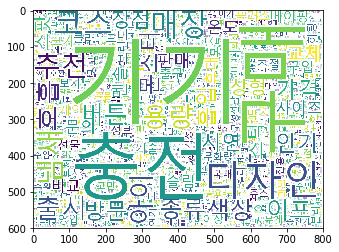

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(sort_result))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')